<a href="https://colab.research.google.com/github/abdipourasl/Deep-Learning-1402/blob/main/DL4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-success">
<h1>Deep Learning Project #4<h1>
Amin Abdipour 401133011</h1>
</div>

#  ***Question 2.1***

## CNN without Dropout, 50 epoch

### Importing Libraries

In [ ]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import pandas as pd
import os
import os.path as op
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
import cv2
drive.mount('/content/gdrive')
# from google.colab.patches import cv2_imshow
# from PIL import Image
from torch.utils.data import random_split, DataLoader
import torch.nn as nn
from sklearn.metrics import accuracy_score, confusion_matrix


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### 1. Import  Data

Define transformations to apply to the data


In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

Load CIFAR-10 train and test datasets


In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:01<00:00, 95441132.00it/s] 


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### 2. Create data loaders

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

### 3. Define CNN Model

In [ ]:
def deep_cnn():
    model = nn.Sequential(
        nn.Conv2d(3, 16, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.Conv2d(16, 32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.Conv2d(32, 64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.Flatten(),
        nn.Linear(64 * 4 * 4, 128),
        nn.ReLU(),
        nn.Linear(128, 10)
    )
    return model

### 6. Define Optimizer & Loss function

In [ ]:
model = deep_cnn()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
model

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Flatten(start_dim=1, end_dim=-1)
  (10): Linear(in_features=1024, out_features=128, bias=True)
  (11): ReLU()
  (12): Linear(in_features=128, out_features=10, bias=True)
)

### 7. Train Model

In [ ]:
# Training the model
for epoch in range(50):  # Loop over the dataset multiple times
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()  # Zero the parameter gradients

        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    # if epoch % 3 == 0:
    #   scheduler.step()
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1,
        running_loss
        ))



Epoch: 1 	Training Loss: 19964.168909
Epoch: 2 	Training Loss: 13682.134972
Epoch: 3 	Training Loss: 11164.723561
Epoch: 4 	Training Loss: 9647.014526
Epoch: 5 	Training Loss: 8530.127198
Epoch: 6 	Training Loss: 7607.021602
Epoch: 7 	Training Loss: 6793.248763
Epoch: 8 	Training Loss: 6140.763022
Epoch: 9 	Training Loss: 5602.320337
Epoch: 10 	Training Loss: 5104.096681
Epoch: 11 	Training Loss: 4720.837495
Epoch: 12 	Training Loss: 4407.539765
Epoch: 13 	Training Loss: 4075.583725
Epoch: 14 	Training Loss: 3899.672740
Epoch: 15 	Training Loss: 3876.764288
Epoch: 16 	Training Loss: 3676.171203
Epoch: 17 	Training Loss: 3579.977373
Epoch: 18 	Training Loss: 3526.021268
Epoch: 19 	Training Loss: 3479.214199
Epoch: 20 	Training Loss: 3498.423759
Epoch: 21 	Training Loss: 3364.046382
Epoch: 22 	Training Loss: 3353.964712
Epoch: 23 	Training Loss: 3372.760815
Epoch: 24 	Training Loss: 3349.914372
Epoch: 25 	Training Loss: 3500.108350
Epoch: 26 	Training Loss: 3528.141326
Epoch: 27 	Trainin

KeyboardInterrupt: ignored

In [ ]:
train_accuracy = 100 * correct_train / total_train
print('Epoch {}, Training Accuracy: {:.2f}%'.format(epoch + 1, train_accuracy))

Epoch 37, Training Accuracy: 91.52%


### 8. Test Model

In [ ]:
# Validation/Test accuracy
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

# Calculate test accuracy
test_accuracy = accuracy_score(all_labels, all_predictions)
print(f'Test Accuracy: {100 * test_accuracy:.2f}%')



Test Accuracy: 68.29%


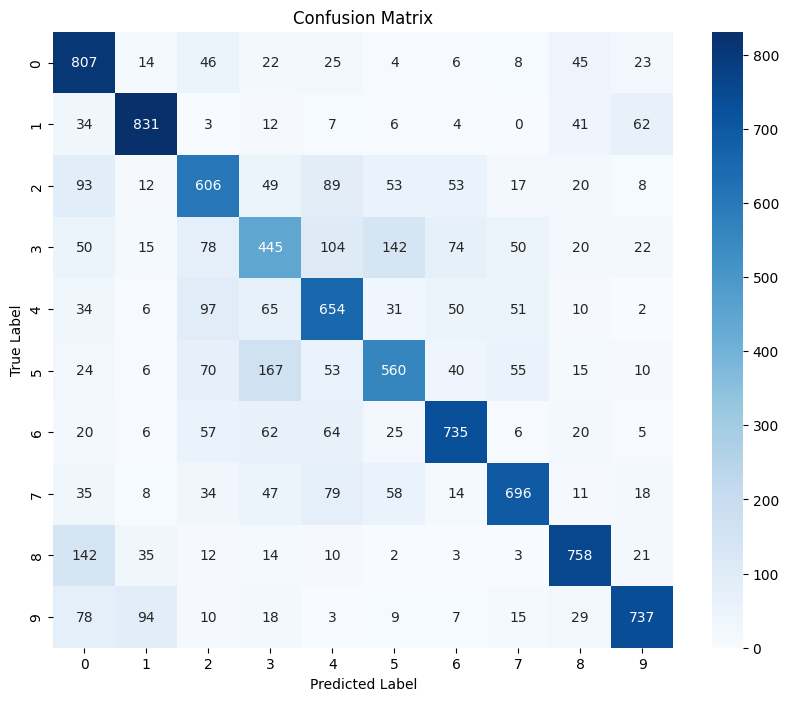

In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Save Model

In [ ]:
model_path = '/content/gdrive/My Drive/DL/DL_HW04/model_50epoch_without_dropout_128.pth'
torch.save(model.state_dict(), model_path)

## Change Model

### 9. with 25 epoch

In [ ]:
model = deep_cnn()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
model

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Flatten(start_dim=1, end_dim=-1)
  (10): Linear(in_features=1024, out_features=128, bias=True)
  (11): ReLU()
  (12): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
# Training the model
for epoch in range(25):  # Loop over the dataset multiple times
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()  # Zero the parameter gradients

        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    # if epoch % 3 == 0:
    #   scheduler.step()
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1,
        running_loss
        ))



Epoch: 1 	Training Loss: 19737.264039
Epoch: 2 	Training Loss: 13459.381367
Epoch: 3 	Training Loss: 11044.713607
Epoch: 4 	Training Loss: 9617.002742
Epoch: 5 	Training Loss: 8481.481084
Epoch: 6 	Training Loss: 7618.595319
Epoch: 7 	Training Loss: 6819.183778
Epoch: 8 	Training Loss: 6170.598821
Epoch: 9 	Training Loss: 5669.327065
Epoch: 10 	Training Loss: 5115.019410
Epoch: 11 	Training Loss: 4731.622064
Epoch: 12 	Training Loss: 4406.725683
Epoch: 13 	Training Loss: 4123.389217
Epoch: 14 	Training Loss: 4046.739562
Epoch: 15 	Training Loss: 3836.279110
Epoch: 16 	Training Loss: 3637.859626
Epoch: 17 	Training Loss: 3675.711293
Epoch: 18 	Training Loss: 3572.808458
Epoch: 19 	Training Loss: 3331.000046
Epoch: 20 	Training Loss: 3462.164291
Epoch: 21 	Training Loss: 3444.403179
Epoch: 22 	Training Loss: 3266.374091
Epoch: 23 	Training Loss: 3348.185818
Epoch: 24 	Training Loss: 3346.975000
Epoch: 25 	Training Loss: 3403.084701


In [ ]:
train_accuracy = 100 * correct_train / total_train
print('Epoch {}, Training Accuracy: {:.2f}%'.format(epoch + 1, train_accuracy))

Epoch 25, Training Accuracy: 91.06%


In [ ]:
# Validation/Test accuracy
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

# Calculate test accuracy
test_accuracy = accuracy_score(all_labels, all_predictions)
print(f'Test Accuracy: {100 * test_accuracy:.2f}%')

# Calculate confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
print('Confusion Matrix:')
print(conf_matrix)


Test Accuracy: 70.08%
Confusion Matrix:
[[775  19  33  23  13  11  10  10  83  23]
 [ 30 830   6   5   4   5   4   4  37  75]
 [ 70   9 585  83  71  71  58  25  21   7]
 [ 29  13  71 481  77 190  69  34  18  18]
 [ 29   2  97  50 636  52  45  64  17   8]
 [ 21   5  60 134  42 643  30  44   9  12]
 [  5   1  77  76  45  27 743   4  13   9]
 [ 16   8  46  32  60  64   9 741   6  18]
 [ 63  31  10  11   5   6  10   4 838  22]
 [ 41 114   8   6   4  12   9  14  56 736]]


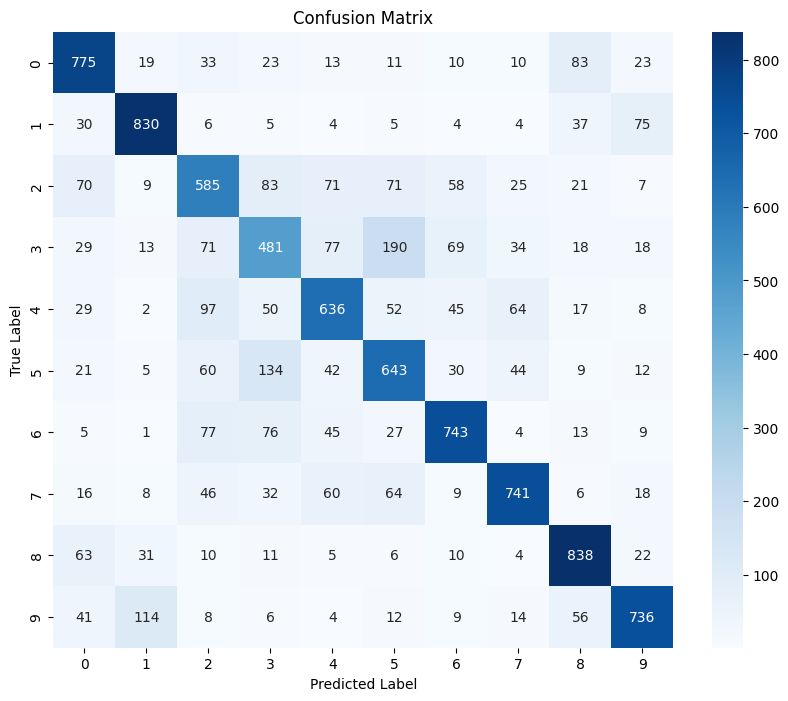

In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
model_path = '/content/gdrive/My Drive/model_25epoch_without_dropout_128.pth'
torch.save(model.state_dict(), model_path)

### 10. with 15 epoch

In [ ]:
model = deep_cnn()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
model

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Flatten(start_dim=1, end_dim=-1)
  (10): Linear(in_features=1024, out_features=128, bias=True)
  (11): ReLU()
  (12): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
# Training the model
for epoch in range(15):  # Loop over the dataset multiple times
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()  # Zero the parameter gradients

        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    # if epoch % 3 == 0:
    #   scheduler.step()
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1,
        running_loss
        ))



Epoch: 1 	Training Loss: 19838.293972
Epoch: 2 	Training Loss: 13418.963405
Epoch: 3 	Training Loss: 11000.895225
Epoch: 4 	Training Loss: 9567.363395
Epoch: 5 	Training Loss: 8408.353703
Epoch: 6 	Training Loss: 7511.396807
Epoch: 7 	Training Loss: 6733.011696
Epoch: 8 	Training Loss: 6063.528681
Epoch: 9 	Training Loss: 5438.065828
Epoch: 10 	Training Loss: 5001.438403
Epoch: 11 	Training Loss: 4608.278359
Epoch: 12 	Training Loss: 4229.546947
Epoch: 13 	Training Loss: 3995.727167
Epoch: 14 	Training Loss: 3860.149777
Epoch: 15 	Training Loss: 3603.306983


In [ ]:
train_accuracy = 100 * correct_train / total_train
print('Epoch {}, Training Accuracy: {:.2f}%'.format(epoch + 1, train_accuracy))

Epoch 15, Training Accuracy: 89.86%


In [ ]:
# Validation/Test accuracy
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

# Calculate test accuracy
test_accuracy = accuracy_score(all_labels, all_predictions)
print(f'Test Accuracy: {100 * test_accuracy:.2f}%')

# Calculate confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
print('Confusion Matrix:')
print(conf_matrix)


Test Accuracy: 71.97%
Confusion Matrix:
[[641  26  84  22  33  13  20  14 105  42]
 [  5 857   4   4   5   2  12   3  25  83]
 [ 36   5 580  72 113  65  85  21  12  11]
 [ 11  12  46 505  84 162 101  27  32  20]
 [  9   2  46  45 757  22  63  44   7   5]
 [  9   7  41 145  73 635  30  36  14  10]
 [  4   6  32  45  40  20 839   4   6   4]
 [  5   7  22  63  89  61  16 719   2  16]
 [ 27  29  17  13   7   7  11   5 852  32]
 [ 21  88   7  12  12   7   9  14  18 812]]


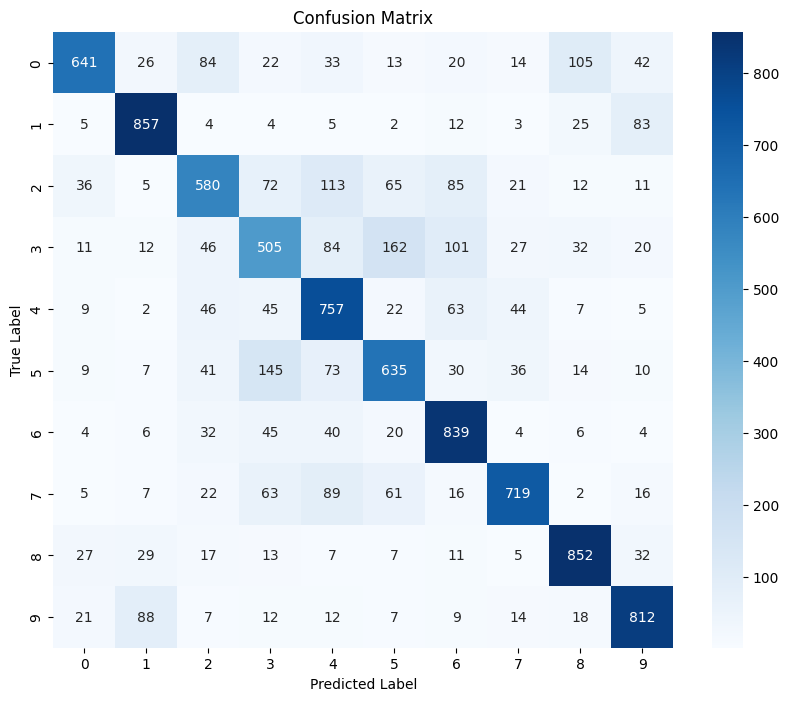

In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
model_path = '/content/gdrive/My Drive/model_15epoch_without_dropout_128.pth'
torch.save(model.state_dict(), model_path)

### 11. input layer of classification = 512

In [ ]:
def deep_cnn2():
    model = nn.Sequential(
        nn.Conv2d(3, 16, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.Conv2d(16, 32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.Conv2d(32, 64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        nn.Flatten(),
        nn.Linear(64 * 4 * 4, 512),
        nn.ReLU(),
        nn.Linear(512, 10)
    )
    return model

In [ ]:
model = deep_cnn2()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
model

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Flatten(start_dim=1, end_dim=-1)
  (10): Linear(in_features=1024, out_features=512, bias=True)
  (11): ReLU()
  (12): Linear(in_features=512, out_features=10, bias=True)
)

In [ ]:
# Training the model
for epoch in range(15):  # Loop over the dataset multiple times
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()  # Zero the parameter gradients

        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    # if epoch % 3 == 0:
    #   scheduler.step()
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1,
        running_loss
        ))



Epoch: 1 	Training Loss: 19718.331998
Epoch: 2 	Training Loss: 13636.294551
Epoch: 3 	Training Loss: 11000.923249
Epoch: 4 	Training Loss: 9224.176964
Epoch: 5 	Training Loss: 7781.597705
Epoch: 6 	Training Loss: 6539.674550
Epoch: 7 	Training Loss: 5380.649314
Epoch: 8 	Training Loss: 4455.765079
Epoch: 9 	Training Loss: 3635.787068
Epoch: 10 	Training Loss: 3200.327387
Epoch: 11 	Training Loss: 2876.592268
Epoch: 12 	Training Loss: 2675.997444
Epoch: 13 	Training Loss: 2358.943230
Epoch: 14 	Training Loss: 2239.713544
Epoch: 15 	Training Loss: 2198.214979


In [ ]:
train_accuracy = 100 * correct_train / total_train
print('Epoch {}, Training Accuracy: {:.2f}%'.format(epoch + 1, train_accuracy))

Epoch 15, Training Accuracy: 94.11%


In [ ]:
# Validation/Test accuracy
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

# Calculate test accuracy
test_accuracy = accuracy_score(all_labels, all_predictions)
print(f'Test Accuracy: {100 * test_accuracy:.2f}%')

# Calculate confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
print('Confusion Matrix:')
print(conf_matrix)


Test Accuracy: 71.14%
Confusion Matrix:
[[784  17  32  17  25  10  11  13  60  31]
 [ 10 842   4  14  11   8   4   4  33  70]
 [ 64  10 574  59 113  64  62  34  14   6]
 [ 29  10  49 465 107 192  80  34  15  19]
 [ 19   5  56  36 740  51  33  52   7   1]
 [ 13   8  38 128  78 641  27  52   6   9]
 [ 12   6  44  52  66  33 768   6  12   1]
 [ 17   7  27  40  95  64  12 727   4   7]
 [ 68  36  16  15  15   5   6   7 803  29]
 [ 39  99   7  14  15   9  15  12  20 770]]


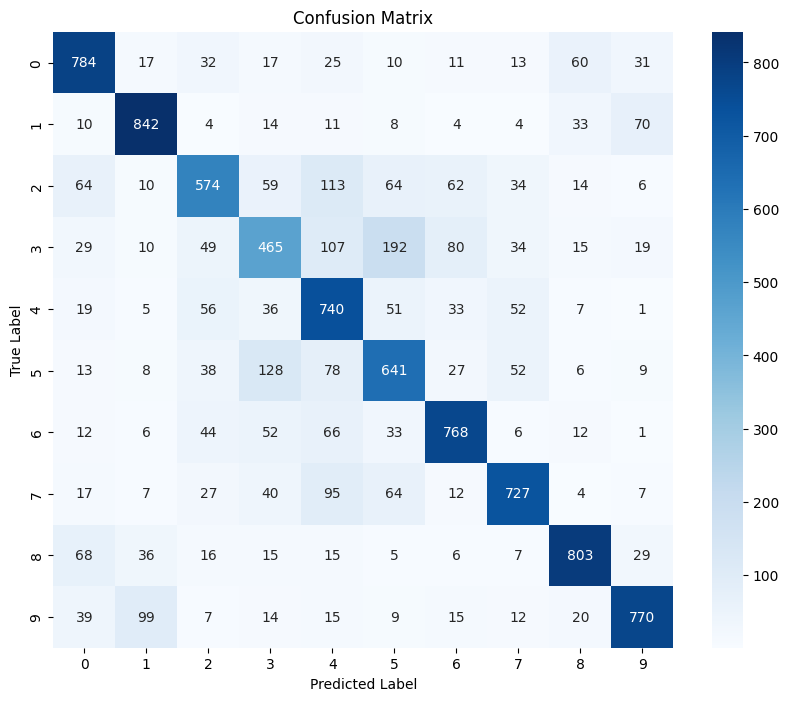

In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
model_path = '/content/gdrive/My Drive/model_50epoch_without_dropout_512.pth'
torch.save(model.state_dict(), model_path)

### 12. with dropout 50%

In [ ]:
import torch.nn as nn
# Define the CNN architecture with the same convolutional layers as before
class DeepCNN(nn.Module):
    def __init__(self):
        super(DeepCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Flatten()
        )
        self.classifier = nn.Sequential(
            nn.Linear(64 * 4 * 4, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 10)  # Output layer with 10 classes
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x


In [ ]:
model = DeepCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
model

DeepCNN(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Flatten(start_dim=1, end_dim=-1)
  )
  (classifier): Sequential(
    (0): Linear(in_features=1024, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [ ]:
# Training the model
for epoch in range(15):  # Loop over the dataset multiple times
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()  # Zero the parameter gradients

        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    # if epoch % 3 == 0:
    #   scheduler.step()
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1,
        running_loss
        ))



Epoch: 1 	Training Loss: 20252.607379
Epoch: 2 	Training Loss: 14486.860559
Epoch: 3 	Training Loss: 12132.683476
Epoch: 4 	Training Loss: 10799.810119
Epoch: 5 	Training Loss: 9749.809639
Epoch: 6 	Training Loss: 9020.297586
Epoch: 7 	Training Loss: 8374.501902
Epoch: 8 	Training Loss: 7793.873027
Epoch: 9 	Training Loss: 7313.608892
Epoch: 10 	Training Loss: 6838.548993
Epoch: 11 	Training Loss: 6639.757368
Epoch: 12 	Training Loss: 6306.938253
Epoch: 13 	Training Loss: 5998.591050
Epoch: 14 	Training Loss: 5921.403296


In [ ]:
train_accuracy = 100 * correct_train / total_train
print('Epoch {}, Training Accuracy: {:.2f}%'.format(epoch + 1, train_accuracy))

Epoch 15, Training Accuracy: 84.23%


In [ ]:
# Validation/Test accuracy
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

# Calculate test accuracy
test_accuracy = accuracy_score(all_labels, all_predictions)
print(f'Test Accuracy: {100 * test_accuracy:.2f}%')

Test Accuracy: 74.15%


In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
model_path = '/content/gdrive/My Drive/DL/DL_HW04/model_50epoch_with_dropout50_512.pth'
torch.save(model.state_dict(), model_path)

### 13. with dropout 50% and 4 layer in fully connected

In [ ]:
import torch.nn as nn
# Define the CNN architecture with the same convolutional layers as before
class DeepCNN(nn.Module):
    def __init__(self):
        super(DeepCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Flatten()
        )
        self.classifier = nn.Sequential(
            nn.Linear(64 * 4 * 4, 2048),
            nn.ReLU(),
            nn.Linear(2048, 1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.4),

            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x


In [ ]:
model = DeepCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)
model

DeepCNN(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Flatten(start_dim=1, end_dim=-1)
  )
  (classifier): Sequential(
    (0): Linear(in_features=1024, out_features=2048, bias=True)
    (1): ReLU()
    (2): Linear(in_features=2048, out_features=1024, bias=True)
    (3): ReLU()
    (4): Dropout(p=0.5, inplace=False)
    (5): Linear(in_features=1024, out_features=512, bias=True)
    (6): ReLU()
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=512, out_features=10, 

In [ ]:
# Training the model
for epoch in range(15):  # Loop over the dataset multiple times
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()  # Zero the parameter gradients

        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    # if epoch % 3 == 0:
    #   scheduler.step()
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1,
        running_loss
        ))



Epoch: 1 	Training Loss: 23786.256941
Epoch: 2 	Training Loss: 16283.989652
Epoch: 3 	Training Loss: 12882.066529
Epoch: 4 	Training Loss: 10602.254834
Epoch: 5 	Training Loss: 8901.550368
Epoch: 6 	Training Loss: 7378.975150
Epoch: 7 	Training Loss: 6014.006164
Epoch: 8 	Training Loss: 4805.117710
Epoch: 9 	Training Loss: 3758.271484
Epoch: 10 	Training Loss: 3003.000568
Epoch: 11 	Training Loss: 2483.065643
Epoch: 12 	Training Loss: 2019.461487
Epoch: 13 	Training Loss: 1712.592233
Epoch: 14 	Training Loss: 1495.105366
Epoch: 15 	Training Loss: 1215.023408


In [ ]:
train_accuracy = 100 * correct_train / total_train
print('Epoch {}, Training Accuracy: {:.2f}%'.format(epoch + 1, train_accuracy))

Epoch 15, Training Accuracy: 96.79%


In [ ]:
# Validation/Test accuracy
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

# Calculate test accuracy
test_accuracy = accuracy_score(all_labels, all_predictions)
print(f'Test Accuracy: {100 * test_accuracy:.2f}%')

Test Accuracy: 73.38%


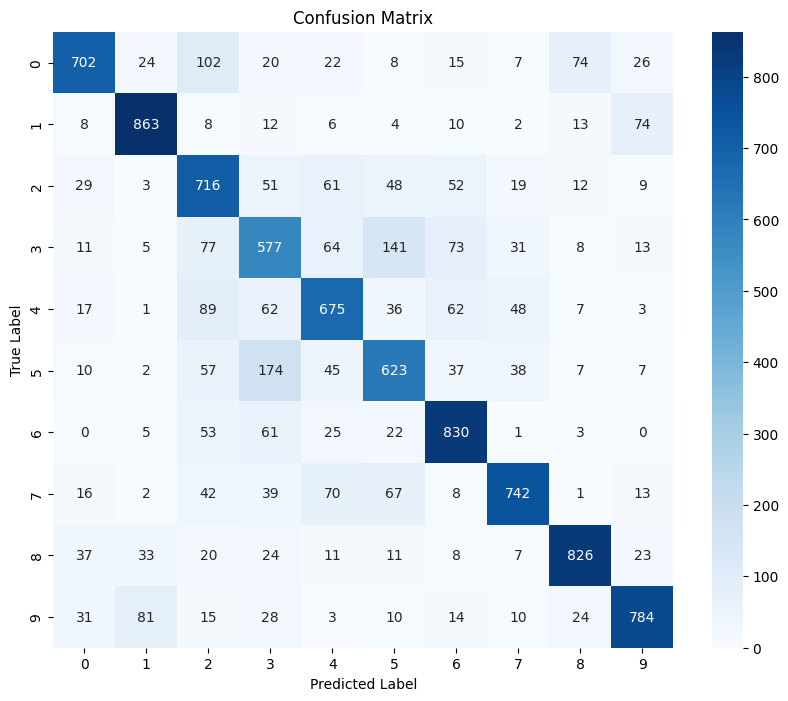

In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
model_path = '/content/gdrive/My Drive/DL/model_50epoch_with_dropout50_512_4layerFC.pth'
torch.save(model.state_dict(), model_path)

#  ***Question 2.2 : CNN with Residual Connections***

### 1. Define Residual Block

In [ ]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride),
            nn.BatchNorm2d(out_channels)
        )

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)
        return out


### 2. Define Model

In [ ]:
class ResidualCNN(nn.Module):
    def __init__(self):
        super(ResidualCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.residual_block1 = ResidualBlock(16, 32, stride=2)
        self.residual_block2 = ResidualBlock(32, 64, stride=2)
        self.residual_block3 = ResidualBlock(64, 128, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.residual_block1(x)
        x = self.residual_block2(x)
        x = self.residual_block3(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


### 3. Define Optimizer & Loss function

In [ ]:
model = ResidualCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

### 4. Train Model

In [ ]:
for epoch in range(10):  # Loop over the dataset multiple times
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()  # Zero the parameter gradients

        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1,
        running_loss
        ))

Epoch: 1 	Training Loss: 17431.309847
Epoch: 2 	Training Loss: 11838.228634
Epoch: 3 	Training Loss: 9106.845169
Epoch: 4 	Training Loss: 7232.717386
Epoch: 5 	Training Loss: 5657.600760
Epoch: 6 	Training Loss: 4349.256569
Epoch: 7 	Training Loss: 3264.089751
Epoch: 8 	Training Loss: 2397.844013
Epoch: 9 	Training Loss: 1869.995202
Epoch: 10 	Training Loss: 1415.532034


In [ ]:
train_accuracy = 100 * correct_train / total_train
print('Epoch {}, Training Accuracy: {:.2f}%'.format(epoch + 1, train_accuracy))

Epoch 10, Training Accuracy: 96.23%


### 4. Test Model

In [ ]:
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

test_accuracy = 100 * correct_test / total_test
print('Epoch {}, Test Accuracy: {:.2f}%'.format(epoch + 1, test_accuracy))


Epoch 10, Test Accuracy: 75.50%


#  ***Question 3.1***

### 1. Load STL10 Dataset

In [ ]:
from torchvision.datasets import STL10

transform_stl10 = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize images to match CIFAR-10 size
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load STL-10 dataset
stl10_dataset = torchvision.datasets.STL10(root='./data', split='test', download=True, transform=transform_stl10)
# Load STL-10 dataset
train_size = int(0.8 * len(stl10_dataset))
val_size = len(stl10_dataset) - train_size
train_dataset, val_dataset = random_split(stl10_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

Files already downloaded and verified


### 2. Load Model


In [ ]:
class DeepCNN(nn.Module):
    def __init__(self):
        super(DeepCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Flatten()
        )
        self.classifier = nn.Sequential(
            nn.Linear(64 * 4 * 4, 2048),
            nn.ReLU(),
            nn.Linear(2048, 1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Dropout(0.4),

            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x
model = DeepCNN()

model_path = '/content/gdrive/My Drive/DL/model_50epoch_with_dropout50_512_4layerFC.pth'
model.load_state_dict(torch.load(model_path))  # Load the trained weights


<All keys matched successfully>

### 3. Freeze


In [ ]:
# Freeze the convolutional layers
for param in model.features.parameters():
    param.requires_grad = False
for param in model.classifier.parameters():
    param.requires_grad = True
# Modify the last fully connected layer for STL-10
num_classes_stl10 = 10
model.classifier[8] = nn.Linear(512, 10)

### 4. Train


In [ ]:
#Define the optimizer for training the fully connected layers
optimizer = torch.optim.SGD(model.classifier.parameters(), lr=0.001, momentum=0.9)

# Training the fully connected layers for STL-10
criterion = nn.CrossEntropyLoss()


In [ ]:
# Training the model
for epoch in range(15):  # Loop over the dataset multiple times
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        optimizer.zero_grad()  # Zero the parameter gradients

        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    # if epoch % 3 == 0:
    #   scheduler.step()
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1,
        running_loss
        ))



Epoch: 1 	Training Loss: 178.128725
Epoch: 2 	Training Loss: 132.685469
Epoch: 3 	Training Loss: 119.712759
Epoch: 4 	Training Loss: 112.808384
Epoch: 5 	Training Loss: 106.354013
Epoch: 6 	Training Loss: 101.680792
Epoch: 7 	Training Loss: 97.109789
Epoch: 8 	Training Loss: 93.314650
Epoch: 9 	Training Loss: 87.942173
Epoch: 10 	Training Loss: 83.589908
Epoch: 11 	Training Loss: 79.840696
Epoch: 12 	Training Loss: 76.198814
Epoch: 13 	Training Loss: 71.919655
Epoch: 14 	Training Loss: 67.791692
Epoch: 15 	Training Loss: 64.806799


In [ ]:
train_accuracy = 100 * correct_train / total_train
print('Epoch {}, Training Accuracy: {:.2f}%'.format(epoch + 1, train_accuracy))

Epoch 15, Training Accuracy: 77.27%


### 5. Test STL-10 with Model


In [ ]:
# Validation/Test accuracy
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for data in val_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

# Calculate test accuracy
test_accuracy = accuracy_score(all_labels, all_predictions)
print(f'Test Accuracy: {100 * test_accuracy:.2f}%')

Test Accuracy: 63.38%


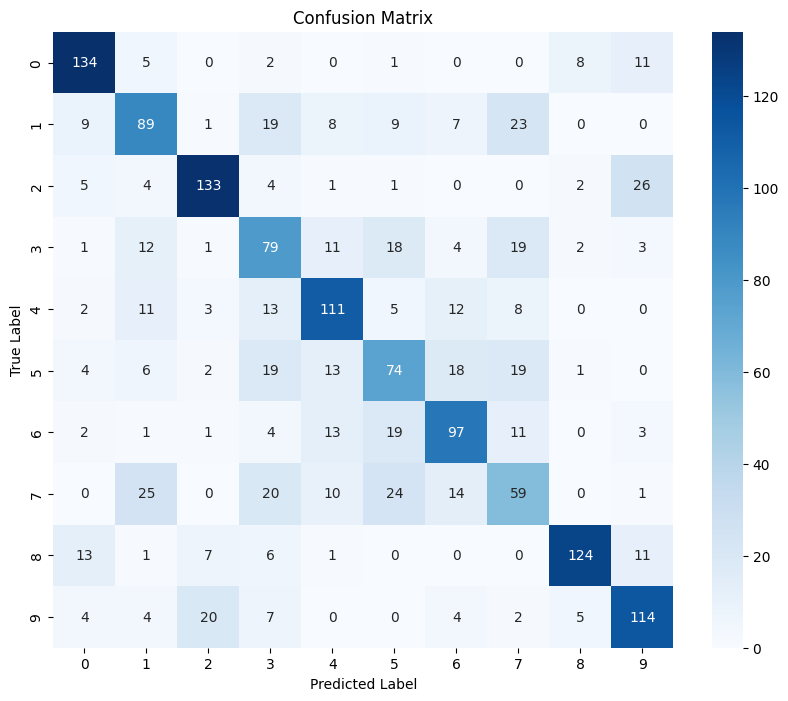

In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#  ***Question 3.2***

### 1. DataLoader for STL-10


In [ ]:
transform = transforms.Compose([
    transforms.Resize((299, 299)),  # InceptionV3 input size
    transforms.ToTensor(),
])

# Load STL-10 dataset
stl10_dataset = STL10(root='./', split='train', transform=transform, download=True)
train_size = int(0.8 * len(stl10_dataset))
val_size = len(stl10_dataset) - train_size
train_dataset, val_dataset = random_split(stl10_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)


100%|██████████| 2640397119/2640397119 [02:16<00:00, 19342366.25it/s]


Extracting ./stl10_binary.tar.gz to ./


### 2. load model

In [ ]:
model = torchvision.models.inception_v3(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 142MB/s]


In [ ]:
model

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

### 3. Modify the inception for STL-10


In [ ]:
# Freeze convolutional layers
for param in model.parameters():
    param.requires_grad = False

# Modify the fully connected layer for 10 classes
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)

# Set the model to device (GPU if available)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.fc.parameters(), lr=0.001)


### 4. Train Model


In [ ]:
for epoch in range(25):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs,aaaaa = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # if epoch % 3 == 0:
    #   scheduler.step()
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1,
        running_loss
        ))

Epoch: 1 	Training Loss: 44.461039
Epoch: 2 	Training Loss: 43.724179
Epoch: 3 	Training Loss: 42.330899
Epoch: 4 	Training Loss: 41.803791
Epoch: 5 	Training Loss: 40.455351
Epoch: 6 	Training Loss: 39.461206
Epoch: 7 	Training Loss: 38.530066
Epoch: 8 	Training Loss: 37.714169
Epoch: 9 	Training Loss: 36.614143
Epoch: 10 	Training Loss: 35.883091
Epoch: 11 	Training Loss: 35.974115
Epoch: 12 	Training Loss: 35.282401
Epoch: 13 	Training Loss: 34.203371
Epoch: 14 	Training Loss: 33.434323
Epoch: 15 	Training Loss: 33.097342
Epoch: 16 	Training Loss: 31.858829
Epoch: 17 	Training Loss: 31.305363
Epoch: 18 	Training Loss: 31.544858
Epoch: 19 	Training Loss: 30.474512
Epoch: 20 	Training Loss: 30.389675
Epoch: 21 	Training Loss: 30.392823
Epoch: 22 	Training Loss: 29.337732
Epoch: 23 	Training Loss: 29.331810
Epoch: 24 	Training Loss: 28.234805
Epoch: 25 	Training Loss: 28.138513


### 5. Test

In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Validation Accuracy: {100 * correct / total}%")

Validation Accuracy: 95.4%


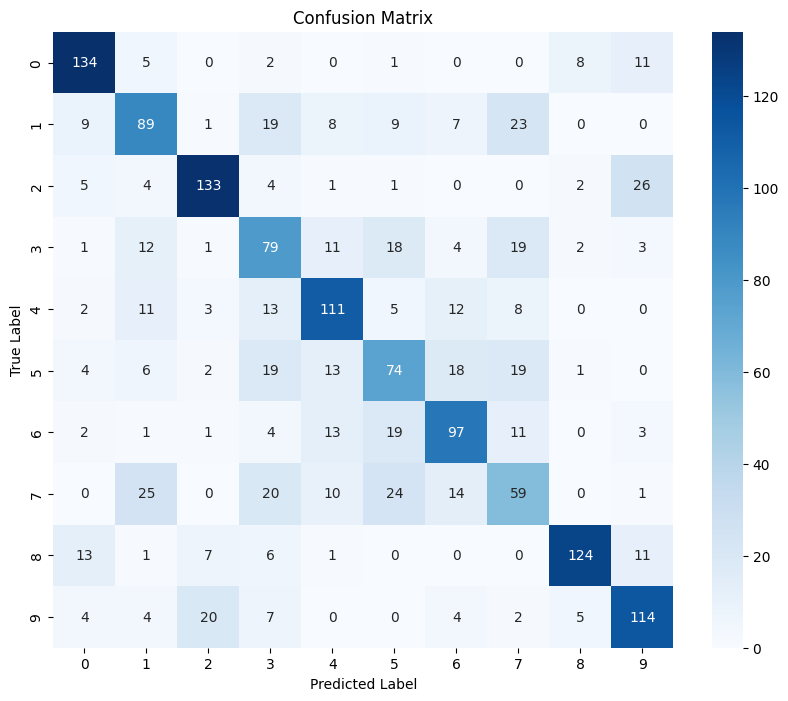

In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()